# Observation of pertubation

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E - \frac{\sigma}{2}(1 + i\omega\tau)\rho E - \frac{\beta^K}{2}\left|E\right|^{2K-2}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We consider all the effects at the same time to see what happens to the laser:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
#Import parameters from python
parameter = np.loadtxt("../results/parameter_pertubation.txt")
Pcr = parameter[0]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])

#Numerical solution
inten_num = np.loadtxt("../results/intensity_pertubation.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

energy = np.loadtxt("../results/energy_pertubation.txt")

In [3]:
print(L, N, Lz, Nz, nb_save)

0.008 128 3.0 9000 50


No handles with labels found to put in legend.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


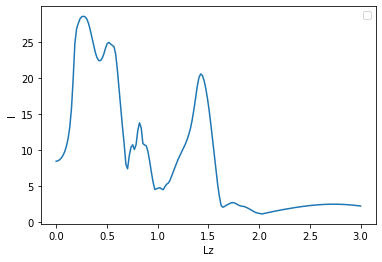

In [6]:
#Energy maximum of laser along z
list_e = []
num_point = inten_num.shape[0]
for i in range(num_point):
    list_e.append(np.max(inten_num[i]))
screen = np.linspace(0, Lz, inten_num.shape[0])
list_e = np.asarray(list_e)

Pcr_const = np.zeros(Nz) + Pcr
fig, ax = plt.subplots()
ax.plot(screen, list_e)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

No handles with labels found to put in legend.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


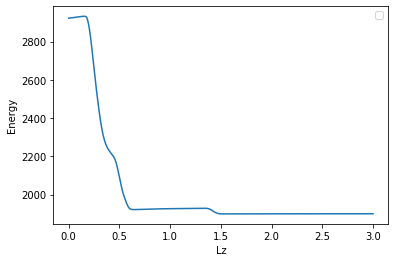

In [8]:
#Total energy of laser along z

screen = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(screen, energy)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('Energy')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

In [9]:
print(energy)

[2921.94792969 2921.96969121 2921.99145396 ... 1899.38697115 1899.38703912
 1899.38710703]


In [ ]:
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)
for i in range(inten_num.shape[0]):
    if (i%10 == 0):
        fig, ax = plt.subplots()
        mesh = ax.pcolormesh(x, y, inten_num[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(mesh, ax=ax)
        plt.xlim(-0.001,0.001)
        plt.ylim(-0.001,0.001)
        fig.show()

In [ ]:
z_interested = np.array([0, 1.5])
pos_interested = z_interested*nb_save/Lz
pos_interested = pos_interested.astype(int)

fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')

for i in range(len(z_interested)):
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]]+5*i,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
    axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#ax.set_zlim(0, 4 )
ax.view_init(10, -60)
plt.show()


In [ ]:
print(inten_num.shape)

In [ ]:


fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')


surf = ax.plot_surface(x,y,inten_num[899],cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.003, 0.003 )
ax.set_ylim(-0.003, 0.003)
ax.view_init(10, -60)
plt.show()
